## Introducción a la gestión de un portafolio de riesgo 
### Adrián Vázquez
#### 20/07/21

<b> Riesgo financiero :  </b>

- Es una medida de la incertidumbre de los rendimientos futuros

<b> Rendimientos Financieros : </b>

- Generalmente se derivan de los precios de las acciones y se expresan como porcentajes en forma decimal 
   - Tipos de retornos. 
       -  Retorno discreto (Retorno simple) : Se agregan entre activos
       - Retorno de registro (Retorno continuo) : Se agregan a lo largo del tiempo 

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
stoncks = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/0f1a004a8aa693163fa55f277513309f710b700d/MSFTPrices.csv', parse_dates=['Date'])

In [17]:
stoncks.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [19]:
stoncks = stoncks.sort_values(by = 'Date')

stoncks.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


<b> Nota:  </b>

La columna de cierre ajustado es la más importante. Está normalizada para las divisiones de acciones, los dividendos y otras acciones corporativas, y es un verdadero reflejo del rendimiento de las acciones a lo largo del tiempo. Usted utilizará el precio de cierre ajustado para calcular los rendimientos de las acciones en este ejercicio.

### Ejercicio.

- Calcular la rentabilidad simple de la acción en la columna 'Adjusted' y guardarla en la columna 'Returns'

### `.pct_change()` 

- Metodo para calcular la rentabilidad simple 

In [22]:
stoncks['Returns'] = stoncks['Adjusted'].pct_change() # Calculando la rentabilidad simple

stoncks.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


#### Graficando la rentabilidad atraves del tiempo. 


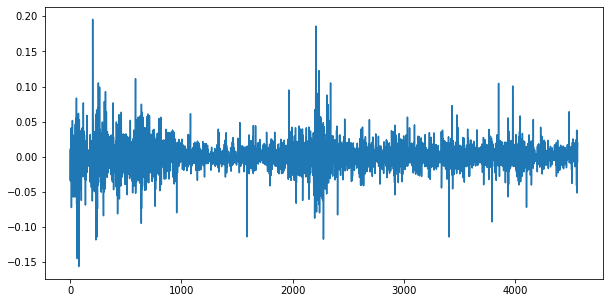

In [26]:
plt.figure(figsize = (10,5))
stoncks['Returns'].plot()
plt.show()

#### <b> Distribuciones de la rentabilidad. </b>

- Para analizar la probabilidad de que se produzcan valores atípicos en las rentabilidades, resulta útil visualizar las rentabilidades históricas de una acción mediante un histograma.

- Puede utilizar el histograma para mostrar la densidad histórica o la frecuencia de un rango determinado de rendimientos. Observe que los valores atípicos de la cola izquierda de la distribución de los rendimientos son los que a menudo quiere evitar, ya que representan grandes rendimientos diarios negativos. Los valores atípicos en la parte derecha de la distribución son normalmente eventos particularmente buenos para la acción, como una sorpresa positiva de ganancias.

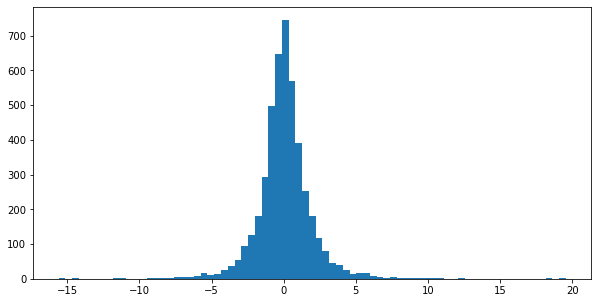

In [28]:
# Pasar de decimal a porcentaje la columna 'Returns'
percent_return = stoncks['Returns']*100
# Eliminar valores NaN 
returns_plot = percent_return.dropna()
# Graficar el histograma
plt.figure(figsize = (10,5))
plt.hist(returns_plot, bins = 75)
plt.show()

#### Momentos en una distribución (media, varianza, etc...)



<b> Importante:  </b>

Los rendimientos financieros tienden a tener un sesgo positivo y una cutosis superior a 3. Quiere decir que los rendimientos financieros la mayor parte del tiempo tendran una mayor probbilidad de valores atipicos y de rendimientos positivos que una distribución normal.  

### <b> Primer momento: Mu </b>

- Puedes calcular la media de la rentabilidad histórica de una acción utilizando la función mean() de numpy.

- Cuando se calcula la rentabilidad media diaria de una acción, se está estimando esencialmente el primer momento ( ) de la distribución de la rentabilidad histórica.

- Pero, ¿de qué sirven las estimaciones de la rentabilidad diaria para un inversor a largo plazo? Puede utilizar la siguiente fórmula para estimar la rentabilidad media anual de una acción dada la rentabilidad media diaria y el número de días de negociación en un año (normalmente hay aproximadamente 252 días de negociación en un año):


### <b> Formula. </b>

#### Rentabilidad media anual  $ = ((1 + \mu)^{252} ) - 1$

### Ejercicio. 

- Calcule la media de la columna "Rentabilidad" para estimar el primer momento ( ) y hágala igual a rentabilidad_media_diaria.

- Utilice la fórmula para obtener la rentabilidad media anualizada suponiendo 252 días de negociación al año. Recuerde que los exponentes en Python se calculan con el operador **.

In [35]:
# Calcular la media diaria de 'Returns'
mean_return_daily = np.mean(stoncks['Returns'])
print('media diaria:',  mean_return_daily)
# Calcular la rentabilidad media anual
mean_return_annualized = ((1 + np.mean(stoncks['Returns']))**252)-1
print('\n')
print('Rentabilidad media anual:  ', mean_return_annualized)

media diaria: 0.00037777546435757725


Rentabilidad media anual:   0.09985839482858783


<b> Conclusión. </b>

- La rentabilidad media diaria de la acción (mu) es del 0,04% al día. Esto supone una rentabilidad anualizada del 9,99% al año.

###  <b> Segundo momento: Varianza </b>

- Al igual que estimaste el primer momento de la distribución de los retornos en el último ejercicio, también puedes estimar el segundo momento, o la varianza de una distribución de retornos usando numpy.

- En este caso, primero tendrás que calcular la desviación estándar diaria ($ \mu $ ), o la volatilidad de los rendimientos utilizando np.std(). La varianza es simplemente $ \mu²  $.

In [41]:
# Calcular la desviación estandar diaria
sigma_daily = np.std(stoncks['Returns'])
print(sigma_daily)
# Calcular la varianza media diaria 
variance_daily = (np.std(stoncks['Returns'])**2)
print('\n')
print(variance_daily)


0.019341100408708328


0.0003740781650197374


<b>Conclusión.  </b>

- La volatilidad media diaria de la acción (sigma) es del 1,93% al día. La varianza media diaria de la acción (el segundo momento) es del 0,04%.

### <b> Anualización de la varianza. </b>

- No se puede anualizar la varianza del mismo modo que se anualiza la media.

- En este caso, tendrá que multiplicar $ \mu $ por la raíz cuadrada del número de días de negociación en un año. Normalmente hay 252 días de negociación en un año natural. Supongamos que este es el caso para este ejercicio.


- Esto le dará la volatilidad anualizada, pero para obtener la varianza anualizada, tendrá que elevar al cuadrado la volatilidad anualizada al igual que lo hizo para el cálculo diario.


### Ejercicio. 

- Anualice sigma_diario multiplicando por la raíz cuadrada de 252 (el número de días de negociación en un año).

- Una vez más, eleve al cuadrado sigma_anualizado para obtener la varianza anualizada.

In [44]:
# Annualizar la volatilidad (desv. estandar)
sigma_annualized = sigma_daily* (np.sqrt(252))
print(sigma_annualized)
# anualizar la desviación
print('\n')
variance_annualized =  sigma_annualized **2
print(variance_annualized)

0.3070304505826317


0.09426769758497383


<b> Conclusión </b>

- Esto supone una volatilidad anualizada (sigma) del 30,7% al año. Y una varianza anualizada del 9,43% al año

##  Asimetría y Curtosis

### <B> El tercer momento. </B>

- La asimetria se puede considerar como una medida de cuánto se inclina una distribución hacia la izquierda o hacia la derecha. 

- Sesgos
    -  Sesgo negativo es una curva inclinada hacia la derecha, mientras el sesgo positivo es una curva inclinada hacia la izquierda  
    
- En finanzas, se busca un sesgo positivo, con una  mayor probabilidad de obtener rendimientos significativamente buenos en el lado derecho de la distribución y una distribución comprimida y predecible del lado izquierdo de rendimientos negativos

### <b> La curtosis  </b>

- Es una medida de grosor de las colas de una distribución, que se puede utilizar como proxy de la probabilidad de valores atípicos 

- #### <b> Importante. </b>

  - En finanzas un alto exceso de curtosis es una indicación de alto riesgo 
  
- <b> NOTA FINAL. </b>

    - Si la curtosis de una distribución es mayor que 3 y la asimetria es distinta de cero, lo mas probable es que los datos no sean normales


### <b> Tercer momento: Skewness </b>

- Para calcular el tercer momento, o la asimetría de una distribución de rendimientos en Python, puede utilizar la función skew() de scipy.stats.

- Recuerde que un sesgo negativo es una curva inclinada hacia la derecha, mientras que un sesgo positivo es una curva inclinada hacia la izquierda. En finanzas, se tiende a querer una asimetría positiva, ya que esto significaría que la probabilidad de grandes rendimientos positivos es inusualmente alta, y los rendimientos negativos están más agrupados y son más predecibles.

<b> Ejercicio </b>

- Importar skew de scipy.stats.

- Elimine los valores que faltan en la columna 'Devoluciones' para evitar errores.

- Calcular la asimetría de clean_returns.

In [47]:
# Importar skew de scipy.stats
from scipy.stats import skew
# Eliminar valores NaN
clean_returns = stoncks['Returns'].dropna()
# Calcular el tercer momento  (skewness) 
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067852


<b> Conclusión. </b>

- El tercer momento (asimetría) de los rendimientos de las acciones es 0,22. Una distribución normal tendría una asimetría mucho más cercana a 0.

#### <b> Cuarto momento: Kurtosis </b>

- Por último, para calcular el cuarto momento de una distribución, puede utilizar la función kurtosis() de scipy.stats.

- Tenga en cuenta que esta función realmente devuelve el exceso de curtosis, no el cuarto momento en sí. Para calcular la curtosis, simplemente sume 3 al exceso de curtosis devuelto por kurtosis().


<b> Ejercicio. </b>

- Importar kurtosis de scipy.stats.

- Utilice clean_returns para calcular el exceso de curtosis.

- Derivar el cuarto_momento a partir de excess_kurtosis.

In [52]:
# Importar kurtosis de scipy.stats
from scipy.stats import kurtosis
# Calcular  el  exceso de kurtosis de la distribución de rendimientos
excess_kurtosis = kurtosis(clean_returns)
print('Exceso de curtosis :', excess_kurtosis)
print('\n')
#  Cuarto momento de la distribución de rendimientos
fourth_moment = excess_kurtosis + 3
print('4TO. Momento: ', fourth_moment)

Exceso de curtosis : 10.31457261802553


4TO. Momento:  13.31457261802553


<b> Conclusión. </b>

- El cuarto momento (curtosis) de los rendimientos de las acciones es 13,31 con un exceso de curtosis de 10,31. Una distribución normal tendería a tener una curtosis de 3 y un exceso de curtosis de 0.

### <b> Pruebas estadísticas de normalidad. </b>

- Para estar realmente seguro de su juicio sobre la normalidad de la distribución de los rendimientos de las acciones, querrá utilizar una verdadera prueba estadística en lugar de examinar simplemente la curtosis o la asimetría.

- Puede utilizar la función shapiro() de scipy.stats para ejecutar una prueba de normalidad de Shapiro-Wilk en los rendimientos de las acciones. La función devolverá dos valores en una lista. El primer valor es la estadística t de la prueba, y el segundo valor es el valor p. Puede utilizar el valor p para juzgar la normalidad de los datos. Si el valor p es menor o igual a 0,05, puede rechazar con seguridad la hipótesis nula de normalidad y asumir que los datos no están distribuidos normalmente.



<b> Ejercicio. </b>

- Importar shapiro de scipy.stats.

- Ejecute la prueba de Shapiro-Wilk en clean_returns.

- Extraiga el valor p de la tupla shapiro_results.

In [55]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro
# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results[0])
# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)





Shapiro results: 0.9003633260726929
P-value:  0.0


<b> Conclusión </b>

- El valor p es 0, por lo que se rechaza la hipótesis nula de normalidad. Los datos son no normales.